In [1]:
import pandas as pd
import numpy as np
import string
from datetime import datetime
import unidecode
from word2number import w2n
import gensim

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'unidecode'

In [2]:
data = pd.read_csv("data/cleaned-train-balanced-sarcasm-1.csv")

In [3]:
data.head()

,label,comment,subreddit,score,ups,downs,created_utc,parent_comment,year,month,day,hour,cleaned comment,cleaned parent comment
0,0,NC and NH.,politics,2,-1,-1,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",2016,10,16,23,NC NH,yeah get argument prefer lived NC well
1,0,You do know west teams play against west teams...,nba,-4,-1,-1,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,2016,11,1,0,know west teams play west teams east teams right,blazers mavericks wests seed even carry good e...
2,0,"They were underdogs earlier today, but since G...",nfl,3,3,0,2016-09-22 21:45:37,They're favored to win.,2016,9,22,21,underdogs earlier today since gronk announceme...,favored win
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,-8,-1,-1,2016-10-18 21:03:47,deadass don't kill my buzz,2016,10,18,21,meme funny none new york nigga ones,deadass kill buzz
4,0,I could use one of those tools.,MaddenUltimateTeam,6,-1,-1,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,2016,12,30,17,could use tools,yep confirm saw tool use made boy easports MUT


In [4]:
data= data.dropna()
data.head()

,label,comment,subreddit,score,ups,downs,created_utc,parent_comment,year,month,day,hour,cleaned comment,cleaned parent comment
0,0,NC and NH.,politics,2,-1,-1,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",2016,10,16,23,NC NH,yeah get argument prefer lived NC well
1,0,You do know west teams play against west teams...,nba,-4,-1,-1,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,2016,11,1,0,know west teams play west teams east teams right,blazers mavericks wests seed even carry good e...
2,0,"They were underdogs earlier today, but since G...",nfl,3,3,0,2016-09-22 21:45:37,They're favored to win.,2016,9,22,21,underdogs earlier today since gronk announceme...,favored win
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,-8,-1,-1,2016-10-18 21:03:47,deadass don't kill my buzz,2016,10,18,21,meme funny none new york nigga ones,deadass kill buzz
4,0,I could use one of those tools.,MaddenUltimateTeam,6,-1,-1,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,2016,12,30,17,could use tools,yep confirm saw tool use made boy easports MUT


In [5]:
data.dtypes

label                      int64
comment                   object
subreddit                 object
score                      int64
ups                        int64
downs                      int64
created_utc               object
parent_comment            object
year                       int64
month                      int64
day                        int64
hour                       int64
cleaned comment           object
cleaned parent comment    object
dtype: object

Top Frequency Word

In [6]:
words_dict = {}
for text in data["cleaned comment"]:
    #print(text)
    token_list = text.split()
    for token in token_list:
        if token in words_dict.keys():
            words_dict[token] += 1
        else :
            words_dict[token] = 1


In [7]:
words_dict = {}
for text in data["cleaned parent comment"]:
    #print(text)
    token_list = text.split()
    for token in token_list:
        if token in words_dict.keys():
            words_dict[token] += 1
        else :
            words_dict[token] = 1


In [8]:
sorted(words_dict.keys())[0:5]

['AA', 'AAA', 'AAAA', 'AAAAA', 'AAAAAA']

In [9]:
string.printable


'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [10]:
sorted(words_dict, key=words_dict.get, reverse = True)[0:5]

['like', 'people', 'would', 'get', 'think']

In [11]:
data_s = data.loc[data["label"]==1, ]
data_ns = data.loc[data["label"]==0, ]

In [12]:
words_dict_s = {}
for text in data_s["cleaned comment"]:
    #print(text)
    token_list = text.split()
    for token in token_list:
        if token in words_dict_s.keys():
            words_dict_s[token] += 1
        else :
            words_dict_s[token] = 1


In [13]:
words_dict_s_keys = sorted(words_dict_s, key=words_dict_s.get, reverse = True)

In [14]:
words_dict_ns = {}
for text in data_ns["cleaned comment"]:
    #print(text)
    token_list = text.split()
    for token in token_list:
        if token in words_dict_ns.keys():
            words_dict_ns[token] += 1
        else :
            words_dict_ns[token] = 1


In [15]:
words_dict_ns_keys = sorted(words_dict_ns, key=words_dict_ns.get, reverse = True)

In [16]:
word_freq_s = {i: round(words_dict_s[i]/10) for i in words_dict_s_keys[0:30]}
word_freq_s

{'yeah': 3207,
 'like': 2576,
 'people': 2090,
 'well': 1782,
 'get': 1686,
 'would': 1592,
 'right': 1509,
 'know': 1429,
 'good': 1244,
 'sure': 1236,
 'yes': 1192,
 'think': 945,
 'make': 921,
 'oh': 919,
 'obviously': 901,
 'really': 896,
 'man': 892,
 'see': 880,
 'never': 845,
 'time': 836,
 'game': 824,
 'need': 813,
 'better': 797,
 'forgot': 792,
 'totally': 781,
 'way': 744,
 'much': 722,
 'could': 706,
 'want': 679,
 'everyone': 662}

In [17]:
#get the top 30 words and block the swaering
temp = words_dict_ns_keys[0:30]
words_dict_ns['fxxk'] = words_dict_ns[temp[8]] 
temp[8] = 'fxxk'

word_freq_ns = {i: round(words_dict_ns[i]/10) for i in temp}
word_freq_ns

{'like': 2938,
 'would': 1981,
 'get': 1726,
 'people': 1547,
 'think': 1528,
 'well': 1175,
 'good': 1162,
 'know': 1139,
 'fxxk': 1023,
 'really': 1023,
 'time': 1021,
 'yeah': 869,
 'even': 869,
 'still': 854,
 'see': 851,
 'could': 828,
 'make': 825,
 'much': 815,
 'right': 801,
 'game': 758,
 'got': 754,
 'go': 748,
 'want': 709,
 'also': 696,
 'sure': 696,
 'going': 686,
 'pretty': 685,
 'way': 678,
 'say': 668,
 'actually': 654}

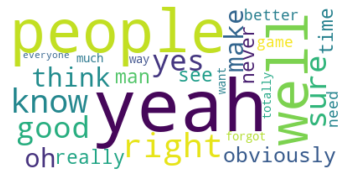

In [20]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
#word_freq = open("/tmp/word_freq.txt").read()
# say it looks like this:
word_freq = word_freq_s
text = " ".join([(k + " ")*v for k,v in word_freq.items()])
#text = data.loc[1000, "cleaned comment"]

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', collocations=False).generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

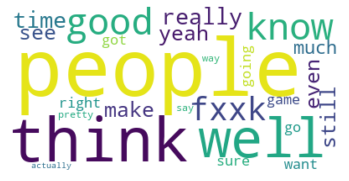

In [21]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
#word_freq = open("/tmp/word_freq.txt").read()
# say it looks like this:
word_freq = word_freq_ns
text = " ".join([(k + " ")*v for k,v in word_freq.items()])
#text = data.loc[1000, "cleaned comment"]

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', collocations=False).generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

In [22]:
subreddit_count_no_label = data.astype({"label": "object"}).groupby(by = ["subreddit"]).count()["comment"]

In [23]:
subreddit_count = data.astype({"label": "object"}).groupby(by = ["subreddit", "label"]).count()["comment"]

In [24]:
subreddit_count

subreddit      label
07Scape        0        1
0x10c          1        2
0x3642         0        1
100DaysofKeto  0        3
100pushups     0        1
                       ..
zweiteliga     1        1
zyramains      0        2
               1        3
zyzz           0        2
               1        2
Name: comment, Length: 21584, dtype: int64

In [25]:
top11_subreddit = subreddit_count_no_label[subreddit_count_no_label>=13800].index

In [26]:
top11_subreddit

Index(['AskReddit', 'funny', 'leagueoflegends', 'nba', 'news', 'nfl',
       'pcmasterrace', 'pics', 'politics', 'todayilearned', 'worldnews'],
      dtype='object', name='subreddit')

In [27]:
top11_multiindex = subreddit_count.reset_index().set_index("subreddit").loc[list(top11_subreddit), ]

In [28]:
top11_final = top11_multiindex[top11_multiindex["label"]==1]

In [29]:
top11_final["Sarcastic"] = top11_final["comment"]

C:\Users\Jason\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
top11_final["Not Sarcastic"] = top11_multiindex[top11_multiindex["label"]==0]["comment"]

C:\Users\Jason\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
top11_final = top11_final[["Sarcastic", "Not Sarcastic"]]
top11_final

,Sarcastic,Not Sarcastic
subreddit,,
AskReddit,26021,38289
funny,8022,9576
leagueoflegends,11290,9383
nba,7355,6534
news,10181,6652
nfl,7139,6755
pcmasterrace,10595,7852
pics,7755,8134
politics,23772,15339


In [86]:
top5 = top11_final.sort_values("Sarcastic", ascending=False).head()

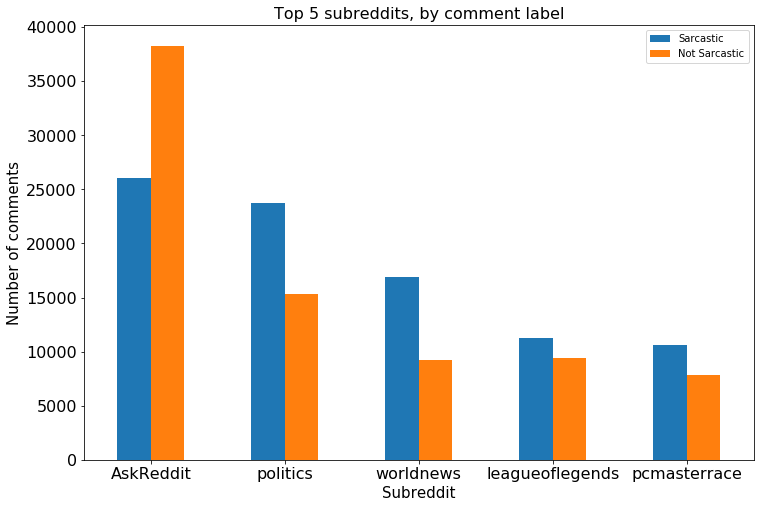

In [116]:
ax = top5.plot.bar(rot=0, figsize = (12,8))

ax.set_title("Top 5 subreddits, by comment label", fontsize=16)
ax.set_xlabel("Subreddit", fontsize=15)
ax.set_ylabel('Number of comments', fontsize=15)

for tick in ax.xaxis.get_major_ticks():

    tick.label.set_fontsize(16) 
    
for tick in ax.yaxis.get_major_ticks():

    tick.label.set_fontsize(16) 

fig = ax.get_figure()
fig.savefig("top5.png", dpi=250, bbox_inches='tight')

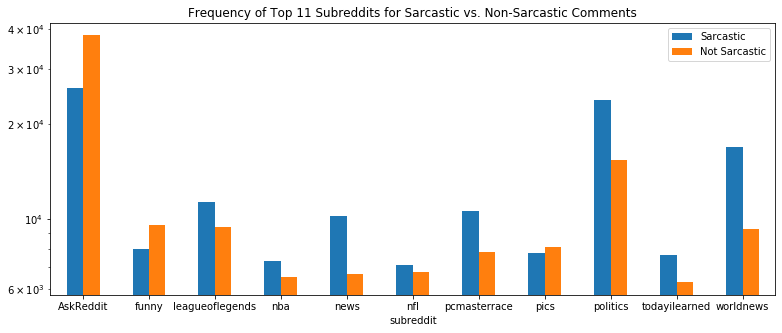

In [34]:
ax = top11_final.plot.bar(rot=0, figsize = (13,5), logy = True, title = "Frequency of Top 11 Subreddits for Sarcastic vs. Non-Sarcastic Comments")

In [39]:
comments_by_year = data.groupby('year')['label'].agg([np.sum,np.mean])
comments_by_year

,sum,mean
year,,
2009,1063,0.583745
2010,2951,0.567609
2011,6896,0.548913
2012,14460,0.537407
2013,33881,0.541161
2014,72798,0.537794
2015,147882,0.524691
2016,220465,0.472667


In [40]:
count_by_year = data.groupby('year')['label'].count()
count_by_year

year
2009      1821
2010      5199
2011     12563
2012     26907
2013     62608
2014    135364
2015    281846
2016    466428
Name: label, dtype: int64

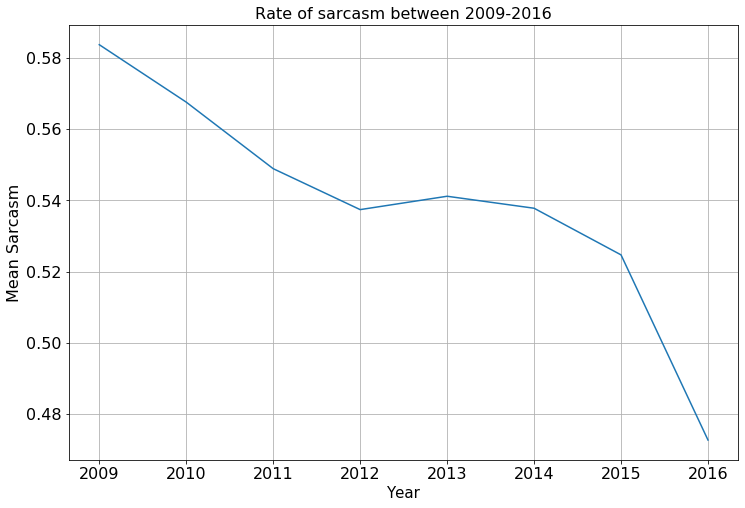

In [79]:
fig, ax = plt.subplots(figsize=(12,8))

#plot = comments_by_year['mean'].plot(kind='line')

ax.plot(comments_by_year['mean'])

plt.ylabel('Mean Sarcasm', fontsize=16)
plt.grid()

ax.set_xlabel("Rate of sarcasm", fontsize=15)
ax.set_xlabel("Year", fontsize=15)
for tick in ax.xaxis.get_major_ticks():

    tick.label.set_fontsize(16) 
    
for tick in ax.yaxis.get_major_ticks():

    tick.label.set_fontsize(16) 

plt.title('Rate of sarcasm between 2009-2016', fontsize=16)

fig.savefig("rate_of_sarcasm.png", dpi=250, bbox_inches='tight')

In [43]:
comments_by_year['mean']

year
2009    0.583745
2010    0.567609
2011    0.548913
2012    0.537407
2013    0.541161
2014    0.537794
2015    0.524691
2016    0.472667
Name: mean, dtype: float64

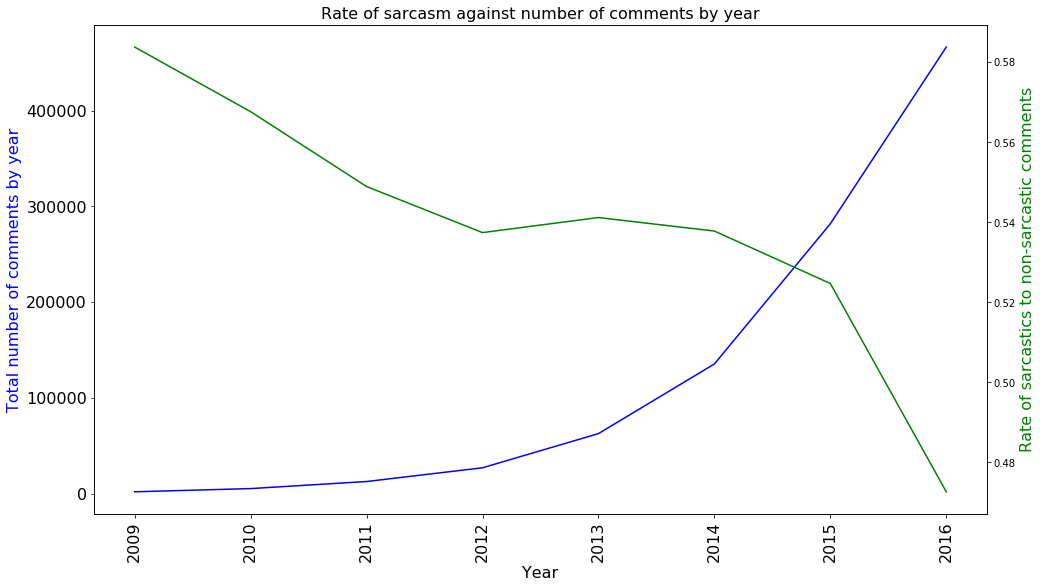

In [64]:
# Plot seven day avg over number of daily trips
fig, ax1 = plt.subplots(figsize=(16,9))

plt.xticks(rotation=90)
ax2 = ax1.twinx()

line1 = ax1.plot(count_by_year, 'b-')
line2 = ax2.plot(comments_by_year['mean'], 'g-')

ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Total number of comments by year', color='b', fontsize=16)
ax2.set_ylabel('Rate of sarcastics to non-sarcastic comments', color='g', fontsize=16)

for tick in ax1.xaxis.get_major_ticks():

    tick.label.set_fontsize(16) 
    
for tick in ax1.yaxis.get_major_ticks():

    tick.label.set_fontsize(16) 
    
for tick in ax2.xaxis.get_major_ticks():

    tick.label.set_fontsize(16) 
    
for tick in ax2.yaxis.get_major_ticks():

    tick.label.set_fontsize(16) 

plt.title("Rate of sarcasm against number of comments by year", fontsize=16)

fig.savefig('sarcasm_to_nonsarcasm.jpg', bbox_inches='tight', dpi =250)

plt.show()

Text(0.5, 1.0, 'Frequency of Scores for Sarcastic vs. Non-Sarcastic Comments')

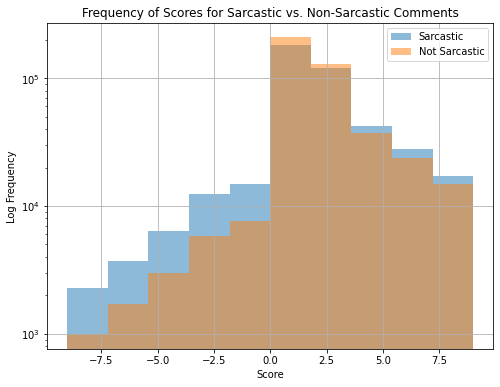

In [80]:
# Mean and STD of Score Rating
mean = data['score'].mean()
std = data['score'].std()

plt.figure(figsize=(8,6))
data[(data['score'].abs()<(10-((data['score'].abs()-mean)/std))) & (data['label']==1)]['score'].hist(alpha=0.5,label='Sarcastic')
data[(data['score'].abs()<(10-((data['score'].abs()-mean)/std))) & (data['label']==0)]['score'].hist(alpha=0.5,label='Not Sarcastic')
plt.yscale('log')
plt.ylabel('Log Frequency')
plt.xlabel('Score')
plt.legend()
plt.title('Frequency of Scores for Sarcastic vs. Non-Sarcastic Comments')

In [83]:
mean


6.919675522999065

In [84]:
std

48.55397472397914

Text(0.5, 1.0, 'Frequency of Scores for Sarcastic vs. Non-Sarcastic Comments')

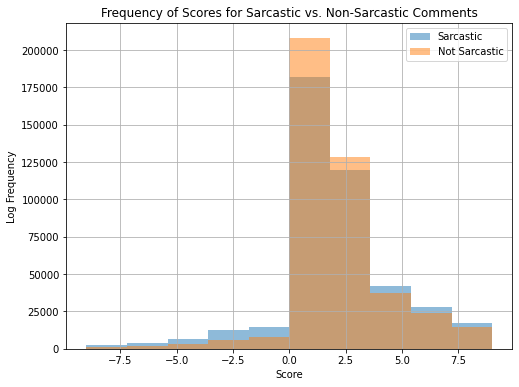

In [81]:
# Mean and STD of Score Rating
mean = data['score'].mean()
std = data['score'].std()

plt.figure(figsize=(8,6))
data[(data['score'].abs()<(10-((data['score'].abs()-mean)/std))) & (data['label']==1)]['score'].hist(alpha=0.5,label='Sarcastic')
data[(data['score'].abs()<(10-((data['score'].abs()-mean)/std))) & (data['label']==0)]['score'].hist(alpha=0.5,label='Not Sarcastic')
plt.ylabel('Log Frequency')
plt.xlabel('Score')
plt.legend()
plt.title('Frequency of Scores for Sarcastic vs. Non-Sarcastic Comments')